# GOOGLE PLAY STORE - Transforming Raw to Clean Data
_______________________

* Consideration: source data was scraped from the web

## Objectives:

* Create a cleaned up version of the Google Play Store Source Data by filtering:

 - Games with no reviews
 - Duplicates
 - Converting all ratings, reviews, installs, and price to uniform types and formats by column
 

* Subsequently, make sure there's no duplicate app names or double counting / aggegration; organize by apps, and remove exact duplicates, and or take the higher of the two


* Final Product should be a cleaned gps source data we'll use to create charts with




In [1]:
# Import Dependencies
%matplotlib notebook
import os 
import csv
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Pull the trigger and covert the original CSV to a dataframe, and print the DF
gps_sourcedata_df = pd.read_csv("./resources/original_raw_data/googleplaystore.csv")

In [3]:
# View Data Details
gps_sourcedata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
# Identify Columns we want to remove and keep
gps_sourcedata_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Drop Unnecessary Columns
cols = [4, 5, 6, 8, -4, -3, -2, -1]
gps_sourcedata_df.drop(gps_sourcedata_df.columns[cols], axis=1, inplace=True)

gps_sourcedata_df

,App,Category,Rating,Reviews,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,0
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,0
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,0


In [6]:
gps_sourcedata_df.rename(columns={'Rating': 'Ratings'}, inplace=True)
gps_sourcedata_df.head()

,App,Category,Ratings,Reviews,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,0


In [7]:
# Create a Currency Column to Match Table Columns Uniform with Apple App Store Data
gps_sourcedata_df['Currency'] = 'USD'
gps_sourcedata_df.head()

,App,Category,Ratings,Reviews,Price,Currency
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,0,USD
1,Coloring book moana,ART_AND_DESIGN,3.9,967,0,USD
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,0,USD
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,0,USD
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,0,USD


In [8]:
# Drop columns with missing data
gps_sourcedata_df = gps_sourcedata_df.dropna(how="any")

In [9]:
# Verify changes
gps_sourcedata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 6 columns):
App         9367 non-null object
Category    9367 non-null object
Ratings     9367 non-null float64
Reviews     9367 non-null object
Price       9367 non-null object
Currency    9367 non-null object
dtypes: float64(1), object(5)
memory usage: 512.3+ KB


In [10]:
# Cleaning Data:

# Remove commas in betwen numbers in Reviews, and convert to int64
gps_sourcedata_df['Reviews'] = [x.replace(",","") for x in gps_sourcedata_df['Reviews']]
gps_sourcedata_df['Reviews'] = [x.replace("M","") for x in gps_sourcedata_df['Reviews']]
gps_sourcedata_df['Reviews'] = [x.replace(".","") for x in gps_sourcedata_df['Reviews']]
gps_sourcedata_df['Category'] = [x.replace("1.9","Productivity") for x in gps_sourcedata_df['Category']]

# Remove $ in betwen numbers in Reviews, and convert to float64
gps_sourcedata_df['Price'] = [x.replace("$","") for x in gps_sourcedata_df['Price']]
gps_sourcedata_df['Price'] = [x.replace("Everyone","0") for x in gps_sourcedata_df['Price']]
gps_sourcedata_df['Price'] = gps_sourcedata_df['Price'].astype(np.float64)
gps_sourcedata_df.head()

C:\Users\JOHNE\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\JOHNE\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\JOHNE\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,App,Category,Ratings,Reviews,Price,Currency
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,0.0,USD
1,Coloring book moana,ART_AND_DESIGN,3.9,967,0.0,USD
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,0.0,USD
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,0.0,USD
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,0.0,USD


In [11]:
gps_sourcedata_df.sort_values(by= ["Ratings"], ascending=False)
gps_sourcedata_df = gps_sourcedata_df.drop(index=10472)

In [12]:
# Sort by Reviews, and drop any cells with missing information to make all columns equal
gps_sourcedata_df = gps_sourcedata_df.sort_values(by= ["Reviews"], ascending=False)

gps_sourcedata_df = gps_sourcedata_df.sort_values(['Reviews'], ascending=False)

gps_filterdata_df = gps_sourcedata_df.drop_duplicates(['App']).sort_values(['Reviews'], ascending=False)

# Change the type for the reviews column
gps_sourcedata_df = gps_sourcedata_df['Reviews'] = gps_sourcedata_df['Reviews'].astype(np.int64)



# Unable to verify or trace what app "Messenger â€“ Text and Video Chat for Free", so dropped it
gps_filterdata_df = gps_filterdata_df.drop(index=382)

In [13]:
gps_filterdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8195 entries, 2989 to 625
Data columns (total 6 columns):
App         8195 non-null object
Category    8195 non-null object
Ratings     8195 non-null float64
Reviews     8195 non-null object
Price       8195 non-null float64
Currency    8195 non-null object
dtypes: float64(2), object(4)
memory usage: 448.2+ KB


In [14]:
gps_filterdata_df.head(10)

,App,Category,Ratings,Reviews,Price,Currency
2989,GollerCepte Live Score,SPORTS,4.2,9992,0.0,USD
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,0.0,USD
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,0.0,USD
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,0.0,USD
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,0.0,USD
7002,Adult Color by Number Book - Paint Mandala Pages,FAMILY,4.3,997,0.0,USD
6724,BSPlayer ARMv7 VFP CPU support,VIDEO_PLAYERS,4.3,9966,0.0,USD
7982,"Easy Resume Builder, Resume help, Curriculum v...",TOOLS,4.3,996,0.0,USD
353,MegaFon Dashboard,COMMUNICATION,3.7,99559,0.0,USD
5326,Al jazeera TV,FAMILY,4.6,9952,0.0,USD


In [15]:
gps_filterdata_df['Category'] = gps_filterdata_df['Category'].str.upper()

In [16]:
#gps_filterdata_df['Reviews'] = gps_filterdata_df['Ratings'].astype(np.float64)
gps_filterdata_df['Reviews'] = gps_filterdata_df['Reviews'].astype(np.int64)

top_quartile = np.percentile(gps_filterdata_df['Reviews'], 75)
top_quartile


43661.0

In [17]:
top_quartile_data_df = gps_filterdata_df.loc[gps_filterdata_df['Reviews'] > top_quartile]
top_quartile_data_df.head(25)

,App,Category,Ratings,Reviews,Price,Currency
353,MegaFon Dashboard,COMMUNICATION,3.7,99559,0.00,USD
10383,Family Guy The Quest for Stuff,GAME,4.0,995002,0.00,USD
4183,HSPA+ Tweaker (3G booster),TOOLS,4.3,99290,0.00,USD
1982,Zombie Catchers,GAME,4.7,990796,0.00,USD
757,Udemy - Online Courses,EDUCATION,4.5,99020,0.00,USD
4159,Wrestling Revolution 3D,SPORTS,4.3,989344,0.00,USD
1902,Dream League Soccer 2018,GAME,4.6,9883806,0.00,USD
1890,My Talking Angela,GAME,4.5,9883367,0.00,USD
3682,"YouCut - Video Editor & Video Maker, No Watermark",VIDEO_PLAYERS,4.6,98819,0.00,USD
4688,VivaVideo - Video Editor & Photo Movie,VIDEO_PLAYERS,4.6,9879473,0.00,USD


In [18]:
#gps_sourcedata_df.sort_values(['Category'], ascending=True)

category_list = np.sort(top_quartile_data_df['Category'].unique())

category_list = list(category_list)
category_list

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'FAMILY',
 'FINANCE',
 'FOOD_AND_DRINK',
 'GAME',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'MAPS_AND_NAVIGATION',
 'MEDICAL',
 'NEWS_AND_MAGAZINES',
 'PARENTING',
 'PERSONALIZATION',
 'PHOTOGRAPHY',
 'PRODUCTIVITY',
 'SHOPPING',
 'SOCIAL',
 'SPORTS',
 'TOOLS',
 'TRAVEL_AND_LOCAL',
 'VIDEO_PLAYERS',
 'WEATHER']

In [19]:
# Only run this once

top_quartile_data_df["Category"] = [x.replace("FINANCE", "Business") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("BUSINESS", "Business") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("SHOPPING", "Business") for x in top_quartile_data_df["Category"]]

top_quartile_data_df["Category"] = [x.replace("LIBRARIES_AND_DEMO", "Education") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("BOOKS_AND_REFERENCE", "Education") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("EDUCATION", "Education") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("BOOKS_AND_REFERENCES", "Education") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("NEWS_AND_MAGAZINES", "Education") for x in top_quartile_data_df["Category"]]


top_quartile_data_df["Category"] = [x.replace("GAMES", "Games") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("GAME", "Games") for x in top_quartile_data_df["Category"]]

top_quartile_data_df["Category"] = [x.replace("PHOTOGRAPHY", "Lifestyle") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("HEALTH_AND_FITNESS", "Lifestyle") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("DATING","Lifestyle") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("BEAUTY", "Lifestyle") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("PARENTING", "Lifestyle") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("LIFE_STYLE", "Lifestyle") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("Life Stlye", "Lifestyle") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("COMICS", "Lifestyle") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("Life Style", "Lifestyle") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("LIFESTYLE", "Lifestyle") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("Health and Fitness", "Lifestyle") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("EVENTS","Lifestyle") for x in top_quartile_data_df["Category"]]

top_quartile_data_df["Category"] = [x.replace("AUTO_AND_VEHICLE", "Productivity") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("PRODUCTIVITY", "Productivity") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("ProductivityS", "Productivity") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("ART_AND_DESIGN", "Productivity") for x in top_quartile_data_df["Category"]]


top_quartile_data_df["Category"] = [x.replace("FOOD_AND_DRINK", "Social") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("FAMILY", "Social") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("ENTERTAINMENT", "Social") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("COMMUNICATION", "Social") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("NEWS_AND_MAGAZING", 'Social') for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("PERSONALIZATION", "Social") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("SOCIAL", "Social") for x in top_quartile_data_df["Category"]]

top_quartile_data_df["Category"] = [x.replace("SPORTS", "Sports") for x in top_quartile_data_df["Category"]]

top_quartile_data_df["Category"] = [x.replace("TRAVEL_AND_LOCAL", "Travel") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("TRAVEL_AND_LOCATION", "Travel") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("WEATHER", "Travel") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("Weather", "Travel") for x in top_quartile_data_df["Category"]]


top_quartile_data_df["Category"] = [x.replace("MEDICAL", "Utility") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("VIDEO_PLAYERS", "Utility") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("MAPS_AND_NAVIGATION", "Utility") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("TOOLS", "Utility") for x in top_quartile_data_df["Category"]]
top_quartile_data_df["Category"] = [x.replace("HOUSE_AND_HOME", "Utility") for x in top_quartile_data_df["Category"]]


C:\Users\JOHNE\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JOHNE\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\JOHNE\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

C:\Users\JOHNE\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\JOHNE\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\JOHNE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [20]:
top_quartile_data_df = top_quartile_data_df.sort_values(['Reviews'], ascending=False)
top_quartile_data_df.head(10)

,App,Category,Ratings,Reviews,Price,Currency
2544,Facebook,Social,4.1,78158306,0.0,USD
381,WhatsApp Messenger,Social,4.4,69119316,0.0,USD
2604,Instagram,Social,4.5,66577446,0.0,USD
1879,Clash of Clans,Games,4.6,44893888,0.0,USD
4005,Clean Master- Space Cleaner & Antivirus,Utility,4.7,42916526,0.0,USD
1872,Subway Surfers,Games,4.5,27725352,0.0,USD
3665,YouTube,Utility,4.3,25655305,0.0,USD
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",Utility,4.7,24900999,0.0,USD
1878,Clash Royale,Games,4.6,23136735,0.0,USD
1966,Candy Crush Saga,Games,4.4,22430188,0.0,USD


In [21]:
top_quartile_data_df['Category'].value_counts()

Social          637
Games           410
Lifestyle       250
Utility         249
Business        143
Education       119
Productivity    104
Sports           76
Travel           61
Name: Category, dtype: int64

In [22]:
### Extract unique categories and respective total counts, and sort by index (Category Name) in Ascending Order
category_sizes = top_quartile_data_df['Category'].value_counts()
category_sizes = list(category_sizes.sort_index(ascending=True))
print(category_sizes)

[143, 119, 410, 250, 104, 637, 76, 61, 249]


In [23]:
### Extract all unique category names only, and put in ascending order
categories =top_quartile_data_df['Category'].unique()
categories_list = list(categories)
categories.sort()
print(categories)

['Business' 'Education' 'Games' 'Lifestyle' 'Productivity' 'Social'
 'Sports' 'Travel' 'Utility']


# Pie Chart

<IPython.core.display.Javascript object>


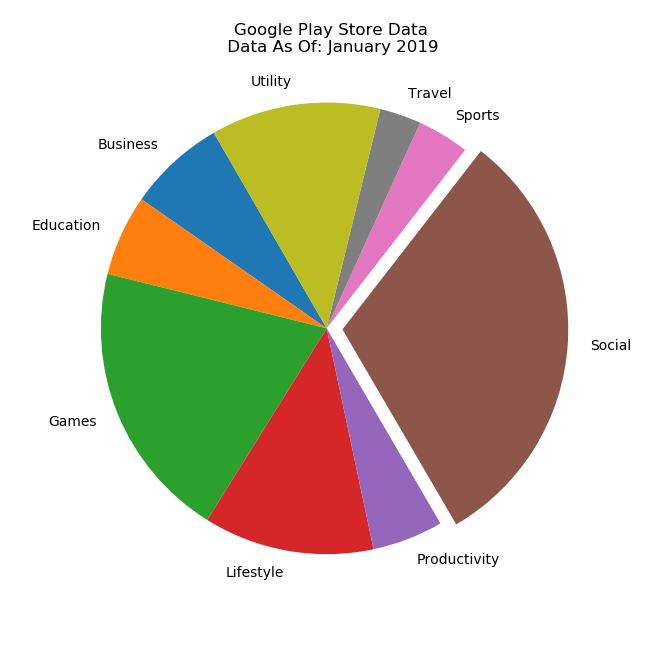

In [24]:
#Creating the Pie Chart
plt.figure(1, figsize=(6.5,6.5))
#members = [143, 119, 413, 251, 104, 636, 76, 60, 247]
explode = [0, 0, 0, 0, 0, 0.07, 0, 0, 0]
plt.pie(category_sizes, labels=categories, explode=explode, shadow=False, startangle=120)
plt.title("Google Play Store Data \n Data As Of: January 2019 \n")
plt.axis("equal")

#Saving the pie chart
plt.savefig("./images/Google_PS_Piechart.png", bbox_inches='tight')

In [26]:
#Exporting the final clean data to it's own CSV file
top_quartile_data_df.to_csv("./resources/final_clean/Final_Google.csv", encoding='utf-8')

# Creating Bar charts

In [28]:
#top_quartile_data_df

In [29]:
#For our bar chart we want the x-axis = categories, y-axis = average rating

#Creating a new dataframe with just Category and Specific Average Ratings
new_df = top_quartile_data_df[['Category', 'Ratings']].copy()
new_df

,Category,Ratings
2544,Social,4.1
381,Social,4.4
2604,Social,4.5
1879,Games,4.6
4005,Utility,4.7
1872,Games,4.5
3665,Utility,4.3
7536,Utility,4.7
1878,Games,4.6
1966,Games,4.4


In [30]:
#Finding the average for each category

#Business
business = float(new_df[new_df['Category'].str.contains("Business")].mean())

#Education
education = float(new_df[new_df['Category'].str.contains("Education")].mean())

#Games
games = float(new_df[new_df['Category'].str.contains("Games")].mean())

#Lifestyle
lifestyle = float(new_df[new_df['Category'].str.contains("Lifestyle")].mean())

#Productivity
productivity = float(new_df[new_df['Category'].str.contains("Productivity")].mean())

#Social Networking
social = float(new_df[new_df['Category'].str.contains("Social")].mean())

#Sports
sports = float(new_df[new_df['Category'].str.contains("Sports")].mean())

#Travel
travel = float(new_df[new_df['Category'].str.contains("Travel")].mean())

#Utility
utility = float(new_df[new_df['Category'].str.contains("Utility")].mean())

ys = [business, education, games, lifestyle, productivity, social, sports, travel, utility]
print(ys)

[4.366433566433566, 4.400840336134453, 4.347560975609757, 4.3852, 4.412499999999999, 4.301726844583986, 4.253947368421052, 4.354098360655738, 4.355421686746986]


In [31]:
categories_b = new_df['Category'].unique()
categories_b = list(categories)
categories_b.sort()
print(categories_b)

['Business', 'Education', 'Games', 'Lifestyle', 'Productivity', 'Social', 'Sports', 'Travel', 'Utility']


<IPython.core.display.Javascript object>


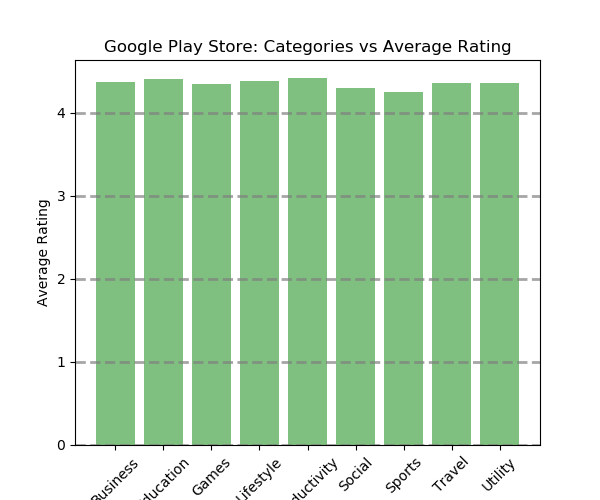

In [32]:
#Charting out the bar graph
#y = [4.37, 4.40, 4.35, 4.38, 4.41, 4.30, 4.25, 4.36, 4.36 ]

plt.figure(2, figsize=(6,5))
plt.bar(categories_b, ys, color='g', alpha=0.5, align="center")
plt.grid(color='grey', linestyle='--', linewidth=2, axis='y', alpha=.7)
plt.xticks(rotation="45")
plt.title("Google Play Store: Categories vs Average Rating")
plt.xlabel("Categories")
plt.ylabel("Average Rating")
plt.show()
plt.savefig("./images/Google_Pie_Chart.png", bbox_inches='tight')

